# Кластерный анализ
## Метод к-средних



Дана матрица данных $X$ и дано число $k$ предполагаемых кластеров. Цель кластеризации представить данные в виде групп кластеров $C=\{C_1, C_2, \ldots, C_k\}$. Каждый кластер имеет свой центр:

\begin{equation}
\mu_i = \frac{1}{n_i} \sum \limits_{x_j \in C_i} x_j
\end{equation}

где $n_i = |C_i|$ - это количество точек в кластере $C_i$.

Таким образом, мы имеем некоторые кластеры $C=\{C_1, C_2, \ldots, C_k\}$ и необходимо оценить качество разбиения. Для этого будем вычислять сумму квадратических ошибок (SSE):

\begin{equation}
SSE(C) = \sum \limits_{i=1}^{k} \sum \limits_{x_j \in C_i} ||x_j - \mu_i||^2
\end{equation}

Цель найти
\begin{equation}
C^* = arg\min\limits_C \{SSE(C)\}
\end{equation}

### Алгоритм к-средних
На вход алгоритм получает матрицу данных $D$, количество кластеров $k$, и критерий остановки $\epsilon$:
1. t = 0
2. случайным образом инициализируем $k$ центров кластеров: $\mu_1^t, \mu_2^t, \ldots, \mu_k^t \in R^d$;
3. повторять
    4. $t = t + 1$;
    5. $C_j = 0$ для всех $j = 1, \ldots, k$
    6. для каждого $x_j \in D$
        7. $j^* = arg\min\limits_C \{||X_j - \mu_i^{t-1}||^2\}$ \\\ присваиваем $x_j$ к ближайшему центру
        8. $C_{j^*} = C_{j^*} \cup {x_j}$
    9. для каждого i=1 до k
        10. $\mu_i = \frac{1}{|C_i|} \sum_{x_j \in C_i} x_j$
11. пока $\sum_{i=1}^k ||\mu_i^{t} - \mu_i^{t-1}||^2 \leq \epsilon$

## Задание
1. Написать программу, реализующую алгоритм к-средних.
2. Визуализировать сходимость центров кластеров.
3. Оценить $SSE$ для значений $k = 1, \ldots, 10$ и построить график зависимости $SSE$ от количества кластеров.

In [78]:
def k_means(features, k, check=True):
    old_cluster = np.zeros(features.shape[0])
    cluster = np.ones(features.shape[0])
    buf = np.arange(features.shape[0])
    choices = np.random.choice(buf, k)
    mu = features[choices]
    sses = []
    while not np.array_equal(old_cluster, cluster):
        old_cluster = cluster        
        dists = []
        for mn in mu:
            dists.append(np.linalg.norm(features - mn, axis=1))
        cluster = np.argmin(dists, axis=0)
        mu = np.array([np.mean(features[cluster == it], 0) for it in range(k)])   
        if(check):            
            plt.scatter(features[:, 0], features[:, 1], c=cluster)
            for i in range(len(mu)):
                plt.scatter(mu[i][0],mu[i][1],marker='4',s=150, color = 'black')      
            plt.show()
    for i in range(len(mu)):
        temp = features[[j for j,v in enumerate(cluster) if v==i]] - mu[i]
        resSSE = np.array([np.linalg.norm(temp[j])**2 for j in range(len(temp))])
        sses.append(resSSE.sum())
    return cluster, mu, np.array(sses).sum()

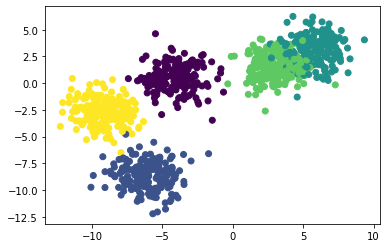

In [79]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import random
import numpy as np
X, Y = make_blobs(n_samples = 1000, n_features=2, centers=5, cluster_std = 1.2, random_state=17)
plt.scatter(X[:,0], X[:,1],c=Y)

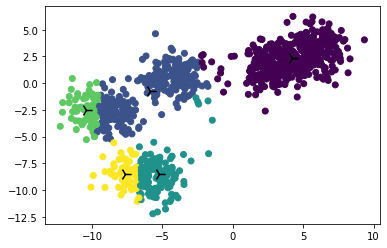

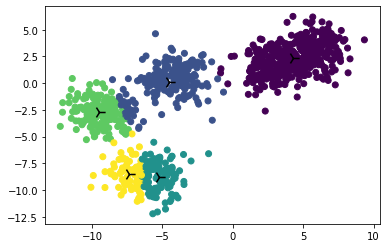

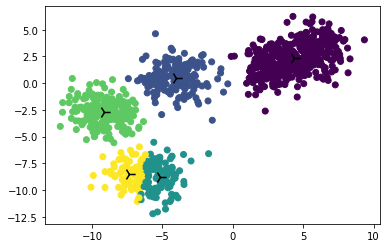

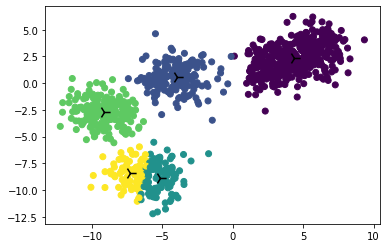

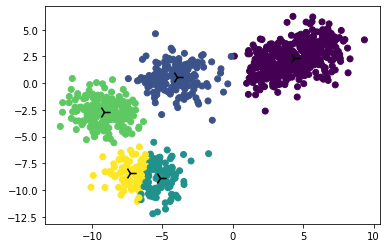

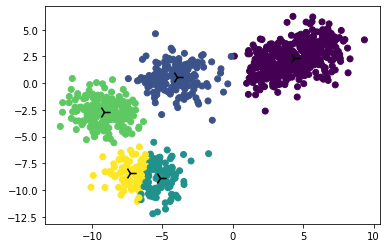

In [80]:

aa, bb, cc = k_means(X,5)

In [81]:
cc/X.shape[0]

3.726807404285141

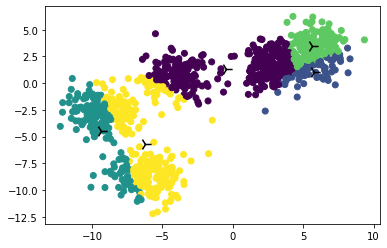

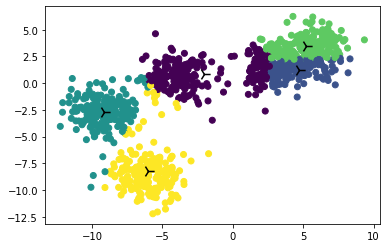

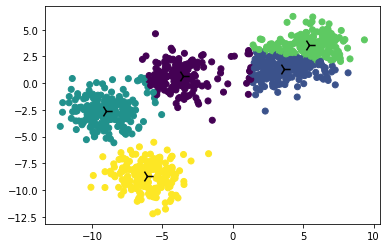

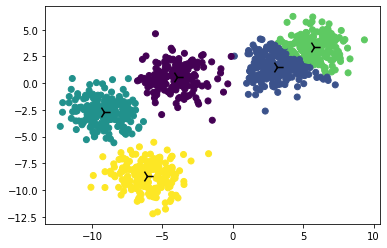

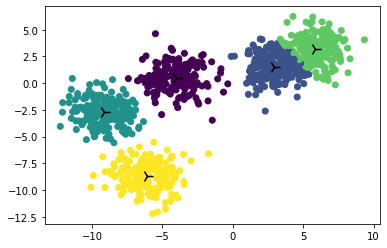

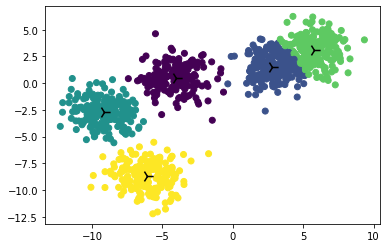

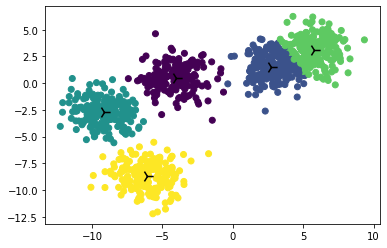

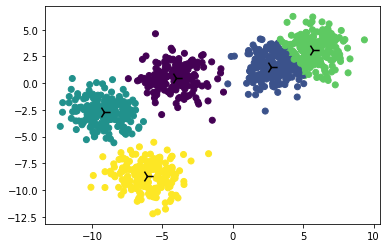

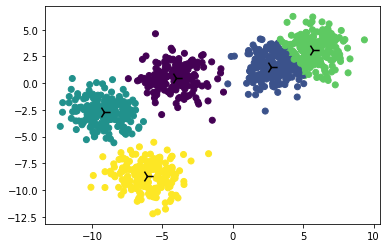

In [82]:
aa1, bb1, cc1 = k_means(X,5)

In [83]:
cc1/X.shape[0]

2.801073147055679

In [ ]:
massive = []
for i in range(1,11):
    a,b,c = k_means(X,i,False)
    massive.append(c)
plt.scatter(range(1,11),massive)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [ ]:
aaaa = KMeans(5)
aaaa.fit(X)

In [ ]:
plt.scatter(X[:,0],X[:,1],c=aaaa.predict(X))

## Реальные данные

используйте метод KMeans из sklearn.clustering

1. Выбрать оптимальное количество кластеров.
2. Построить 
2. Произвести анализ получившихся кластеров:
    1. определите средний год автомобилей;
    2. определите средний пробег автомобилей;
    3. определите среднюю мощность;
    4. определите среднюю цену автомобилей;
    5. основные марки автомобилей в кластере;
    6. определите тип топлива;
    7. определите основной тип кузова;
    8. определите основной тип привода;
    9. определите основной тип КПП;
    10. определите количество хозяев автомобиля.
Охарактеризуйте каждый класстер.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('data.csv', encoding='cp1251')
df = df.drop(columns=['Модель', 'Цвет'])
df.head()

In [ ]:
new_df = pd.get_dummies(df)
new_df.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
new_df[['Год', 'Пробег', 'Объем', 'Мощность', 'Цена']] = ss.fit_transform(new_df[['Год', 'Пробег', 'Объем', 'Мощность', 'Цена']])
new_df.head()

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
inertia = []
for it in np.arange(10,11,1):
    method = KMeans(n_clusters=it)
    method.fit(new_df)
    inertia.append(method.inertia_)
    print(it)

In [ ]:
def cls_info(df, k):
    print('------ Кластер ', k, ' -------')
    claster =  df[method.labels_ == k]
    print(claster['Год'].mean())
    print(claster['Пробег'].mean())
    print(claster['Объем'].mean())
    print(claster['Мощность'].mean())
    print(claster['Цена'].mean())
    print('---------------------------')
    print(claster['Привод'].value_counts().head(1))
    print('---------------------------')
    print(claster['Марка'].value_counts().head(2))
    print('---------------------------')
    print(claster['Кузов'].value_counts().head(2))
    print('---------------------------')
    print(claster['КПП'].value_counts().head(2))
    print('*****************************')

In [ ]:
for it in range(10):
    cls_info(df, it)